In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import re
import glob
import os
%matplotlib inline
### code based on https://www.kaggle.com/code/adamlouly/exploratory-data-analysis-on-wisdm

In [3]:
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

plt.rcParams["figure.figsize"] = (20,10)

data_folder_path = "test_run/original_datasets/wisdm-dataset/raw"

In [8]:
all_device_folders = sorted(glob.glob(data_folder_path + "/*"))
all_data = []
acc_data = []
gyro_data = []
for folder in all_device_folders:
    device = os.path.split(folder)[-1]
    all_sensor_folders = sorted(glob.glob(folder + "/*"))
    for sensor_folder in all_sensor_folders:
        sensor = os.path.split(sensor_folder)[-1]
        label = device + " " + sensor
        print(label)
        for trial_user_file in sorted(glob.glob(sensor_folder + "/*.txt")):
            df = pd.read_csv(trial_user_file, header=None)
            df = df[[0, 1, 3, 4, 5]]
            df.columns = ['user-id', 'activity', 'x-axis', 'y-axis', 'z-axis']
            df = df.astype({'user-id': 'string'})
            df['z-axis'].replace({';': ''}, regex=True, inplace=True)
            df['z-axis']=pd.to_numeric(df['z-axis'],errors='coerce')
            df['device'] = label
            all_data.append(df)
            if sensor == 'accel':
                acc_data.append(df)
            elif sensor == 'gyro':
                gyro_data.append(df)
all_df = pd.concat(all_data)
acc_df = pd.concat(acc_data)
gyro_df = pd.concat(gyro_data)

phone accel
phone gyro
watch accel
watch gyro


In [10]:
acc_df.head()

,user-id,activity,x-axis,y-axis,z-axis,device
0,1600,A,-0.364761,8.793503,1.055084,phone accel
1,1600,A,-0.879730,9.768784,1.016998,phone accel
2,1600,A,2.001495,11.109070,2.619156,phone accel
3,1600,A,0.450623,12.651642,0.184555,phone accel
4,1600,A,-2.164352,13.928436,-4.422485,phone accel


In [11]:
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8581449 entries, 0 to 66591
Data columns (total 6 columns):
 #   Column    Dtype  
---  ------    -----  
 0   user-id   string 
 1   activity  object 
 2   x-axis    float64
 3   y-axis    float64
 4   z-axis    float64
 5   device    object 
dtypes: float64(3), object(2), string(1)
memory usage: 458.3+ MB


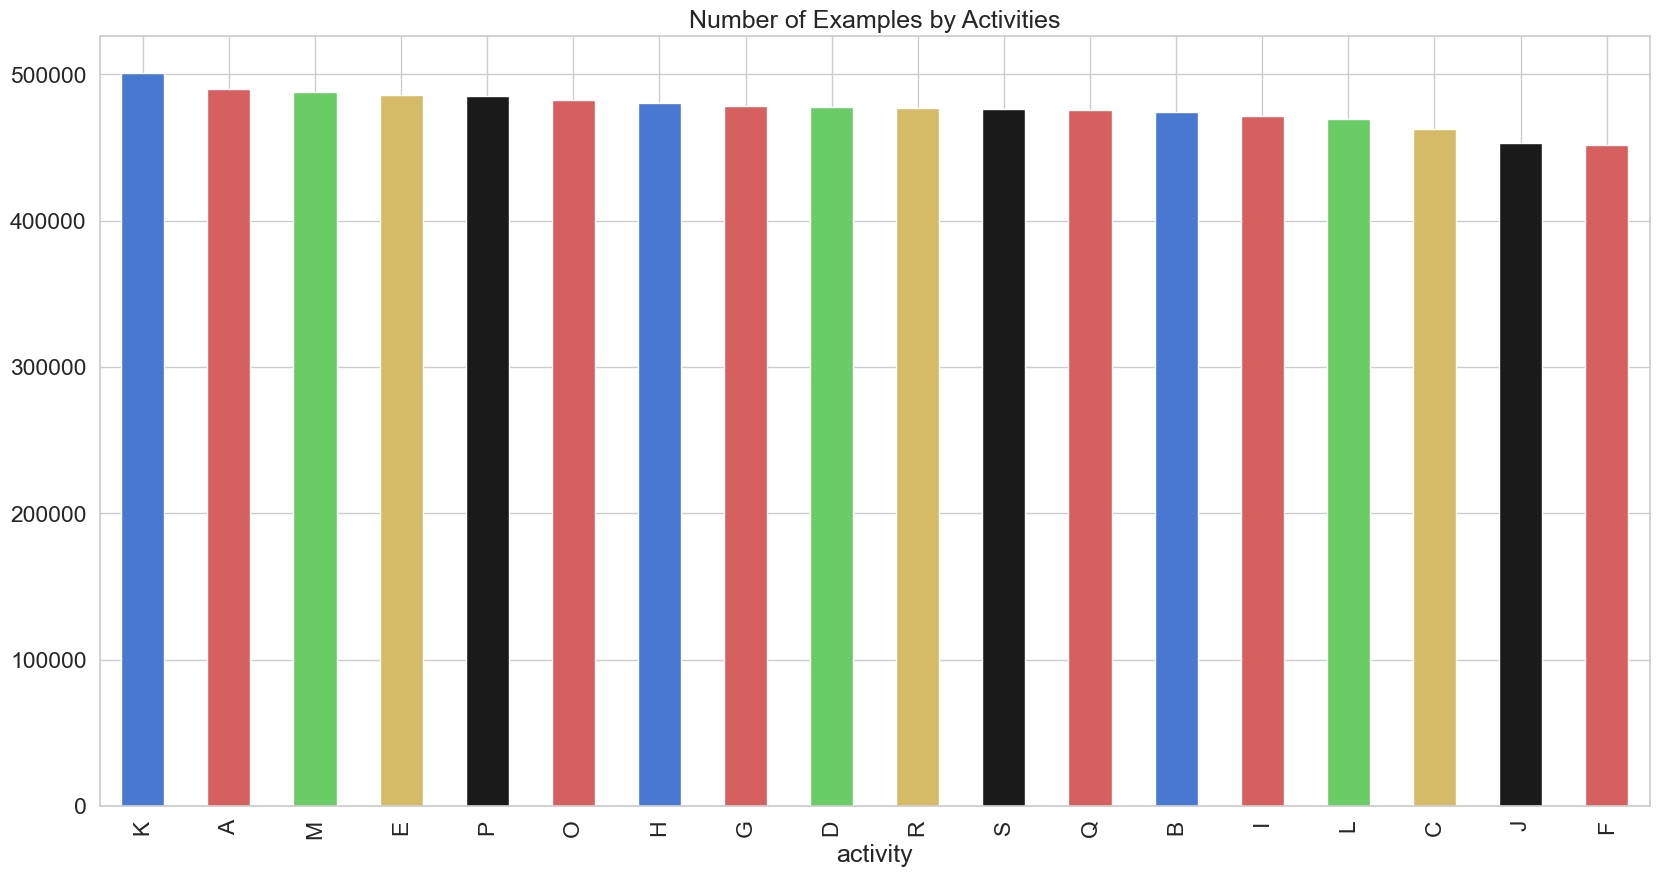

In [17]:
acc_df['activity'].value_counts().plot(kind='bar', title='Number of Examples by Activities',color=['b','r','g','y','k','r']);

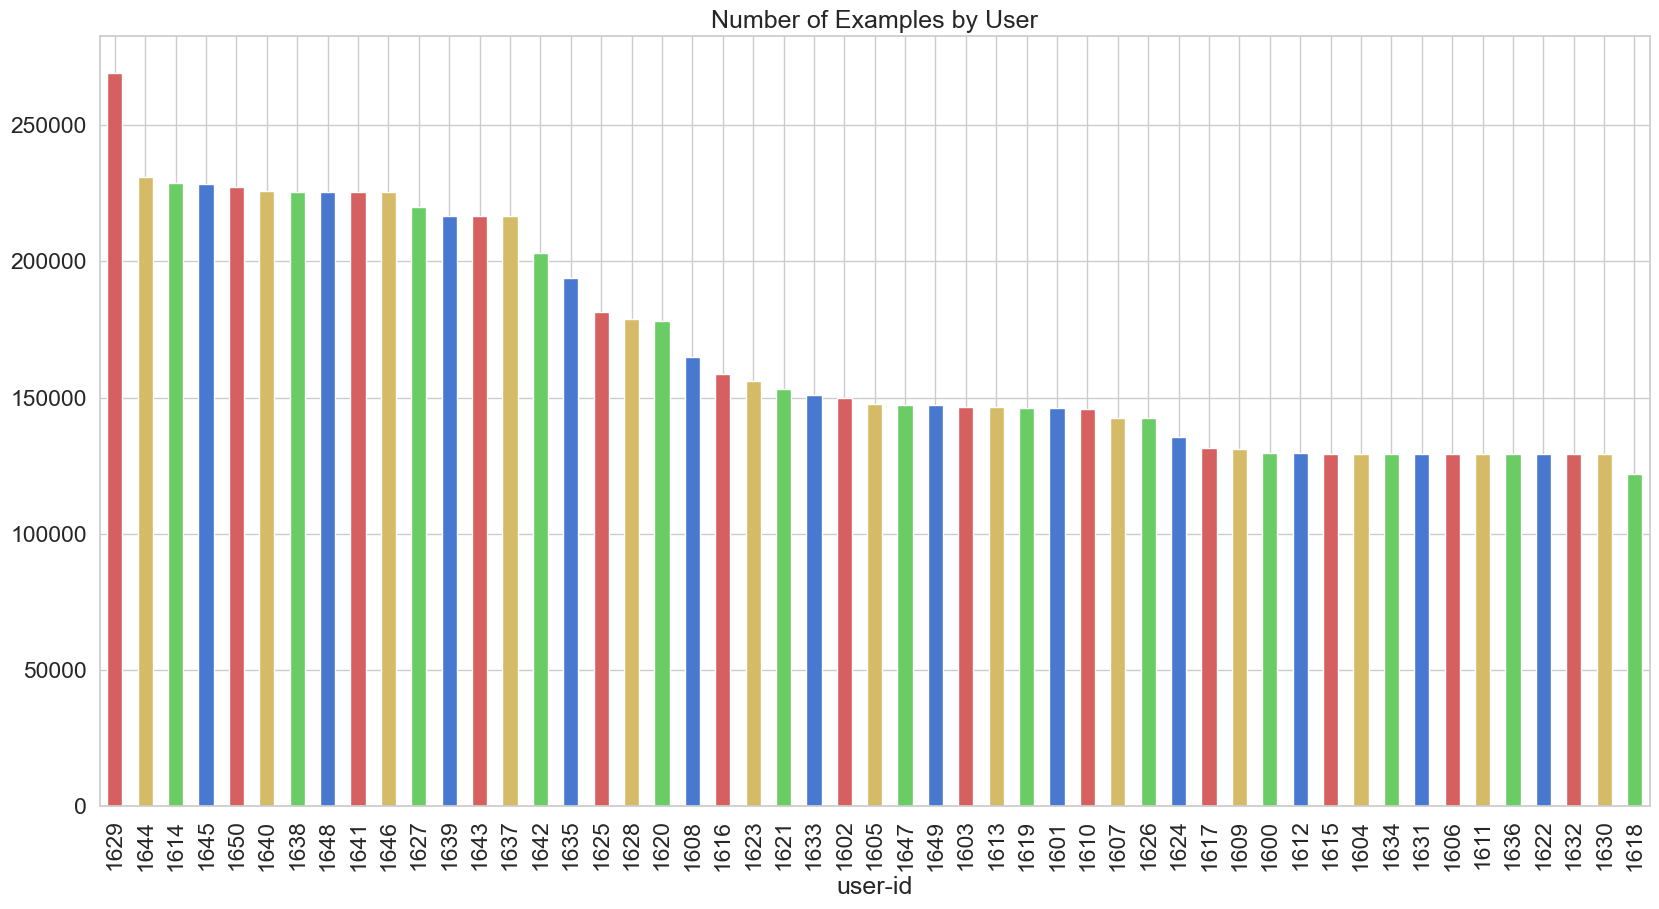

In [19]:
acc_df['user-id'].value_counts().plot(kind='bar', title='Number of Examples by Device',color=['r','y','g','b']);


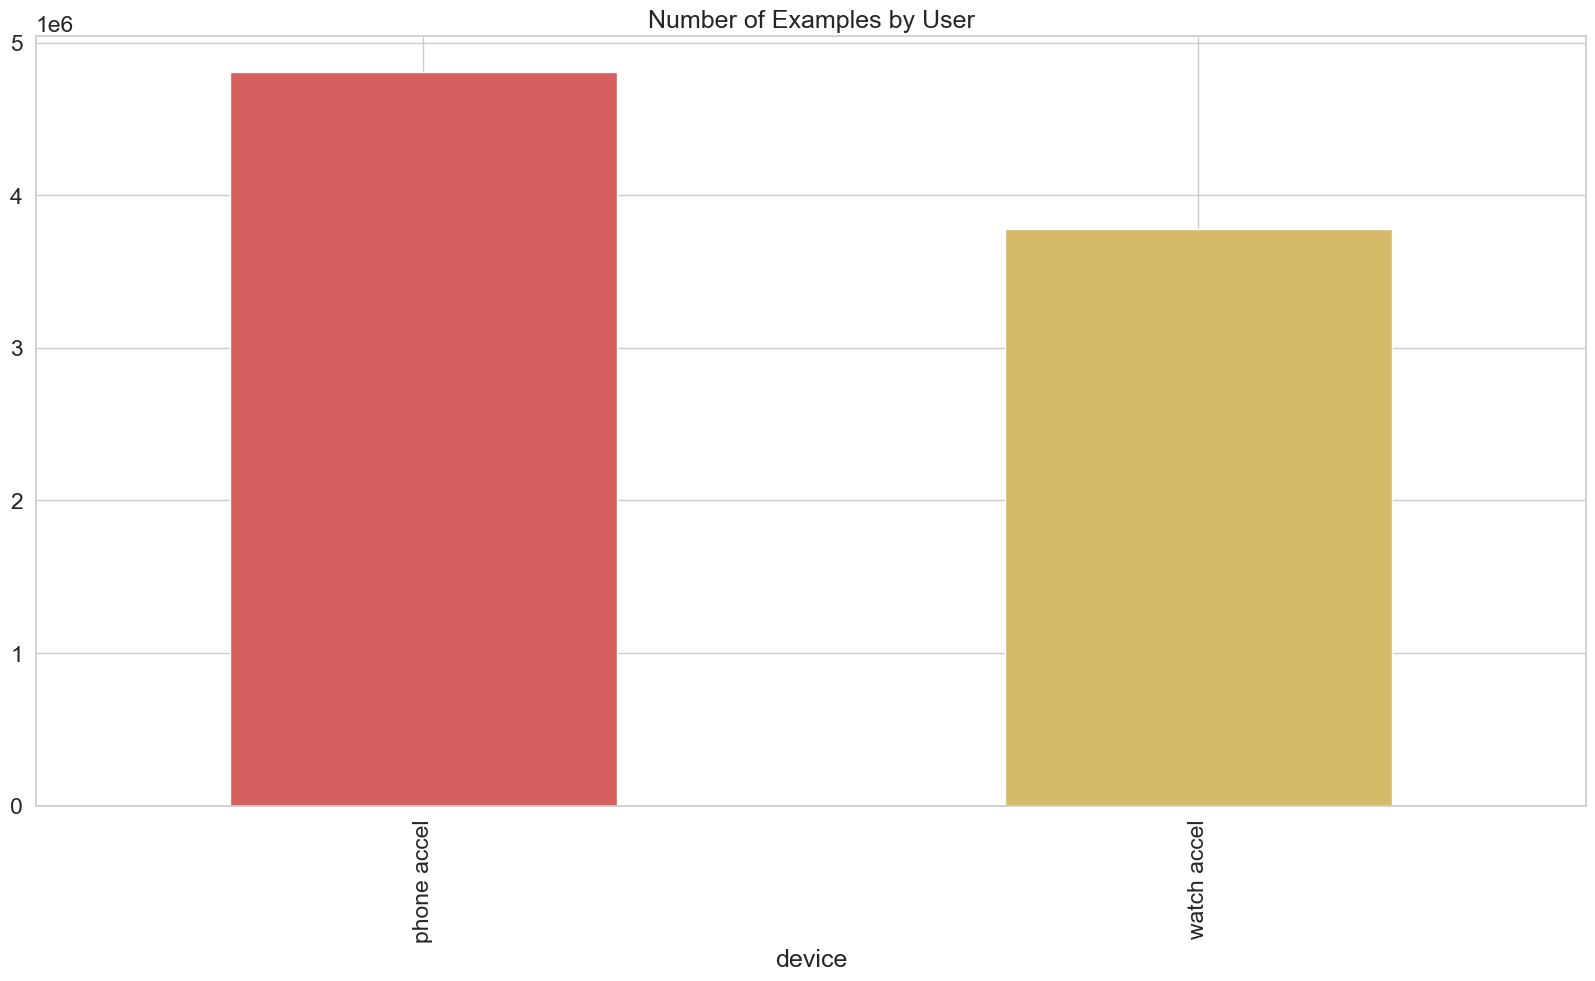

In [15]:
acc_df['device'].value_counts().plot(kind='bar', title='Number of Examples by User',color=['r','y','g','b']);
